<div style="background-color: #103778; 
            color: white; 
            padding: 10px; 
            text-align: center;
            font-size: 20px;">
    <h1>PARTE II</h1>
</div>

# Introdução
Nesta segunda etapa, irei abordar o conceito de Clustering, que é um tipo de machine learning não supervisionada em que o algoritmo porcessa os dados e os divide em grupos com base em similaridades. 

Na PARTE I, realizamos a segmentação dos clientes de forma manual, respeitando as regras do RFM, que analisa quanto tempo faz desde que a última compra, com que fequência compra e quanto gasta. Esta abordagem apresenta certas limitações na segmentação e dependendo do objetivo final a segmenteção feito pela RFM pode não ser suficiente.

Quando usamos Cluster (Clusterização ou Agrupamento), estamos utilizanco machine learning, algoritmos como K-Means que antomaticamente, separa dados em grupos baseados em similaridades estatísticas. Ele identifica padrões complexos não obvios, segmentando clientes por múltiplos comportamentos, não apenas analisando as vendas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import utils.funcoes as func
import datetime as dt

In [2]:
df = pd.read_csv("data/online_retail.csv", sep=",")
display(df)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
func.df_summary_report(df)

,Coluna,Tipo,Quantidade de Dados Não Vazios,Quantidade de Dados Vazios,Valores Únicos,Porcentagem de Unicidade,Porcentagem de Valor Vazios (%)
0,index,int64,541909,0,541909,100.00,0.00
1,InvoiceNo,str,541909,0,25900,4.78,0.00
2,StockCode,str,541909,0,4070,0.75,0.00
3,Description,str,540455,1454,4223,0.78,0.27
4,Quantity,int64,541909,0,722,0.13,0.00
5,InvoiceDate,str,541909,0,23260,4.29,0.00
6,UnitPrice,float64,541909,0,1630,0.30,0.00
7,CustomerID,float64,406829,135080,4372,0.81,24.93
8,Country,str,541909,0,38,0.01,0.00


In [4]:
df.describe()

,index,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000,406829.000000
mean,270954.000000,9.552250,4.611114,15287.690570
std,156435.797851,218.081158,96.759853,1713.600303
min,0.000000,-80995.000000,-11062.060000,12346.000000
25%,135477.000000,1.000000,1.250000,13953.000000
50%,270954.000000,3.000000,2.080000,15152.000000
75%,406431.000000,10.000000,4.130000,16791.000000
max,541908.000000,80995.000000,38970.000000,18287.000000


In [5]:
uni_negativa = (df['UnitPrice'] < 0).sum()
print(f'Existem {uni_negativa} com precificação negativa')

quant_negativa = (df['Quantity'] < 0).sum()
print(f'Existem {quant_negativa} quantidade de unidades com transações negativas')

Existem 2 com precificação negativa
Existem 10624 quantidade de unidades com transações negativas


In [6]:
# Exclusão dos dados ausentes nas colunas "CustomerID" e "Description"
df.dropna(subset=["CustomerID"], inplace=True)
df.dropna(subset=["Description"], inplace=True)

# Converte a coluna InvoiceDate para datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Cria a coluna "Total" que corresponde o gasto total por transação
df['Total'] = df['Quantity'] * df['UnitPrice']
display(df)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [7]:
# Verifica a primeira 'letra'
verificacao = df['InvoiceNo'].str.startswith('C')
cont = verificacao.sum()
print(f'Existem {cont} transações que começam com C')

Existem 8905 transações que começam com C


In [8]:
#Exclur as transações canceladas
df = df[~verificacao]

display(df)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [10]:
df = df[df['InvoiceDate'].dt.to_period('M') != '2010-12']

display(df)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
42481,42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.50
42482,42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.50
42483,42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.50
42484,42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.50
42485,42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.50
...,...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


Foram identificadas transações com UnitPrice igual a zero. Após análise exploratória, verificou-se que tais registros não representavam vendas efetivas, sendo portanto removidos para evitar distorções nas métricas de faturamento.

In [30]:
df.loc[df["Total"] == 0]

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
47068,47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0
47070,47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0
56674,56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom,0.0
86789,86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom,0.0
130188,130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom,0.0
139453,139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom,0.0
145208,145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom,0.0
157042,157042,550188,22636,CHILDS BREAKFAST SET CIRCUS PARADE,1,2011-04-14 18:57:00,0.0,12457.0,Switzerland,0.0
187613,187613,553000,47566,PARTY BUNTING,4,2011-05-12 15:21:00,0.0,17667.0,United Kingdom,0.0
198383,198383,554037,22619,SET OF 6 SOLDIER SKITTLES,80,2011-05-20 14:13:00,0.0,12415.0,Australia,0.0


In [31]:
len(df.loc[df["Total"] == 0])

37

In [27]:
df.loc[df["Quantity"] == 0]

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total


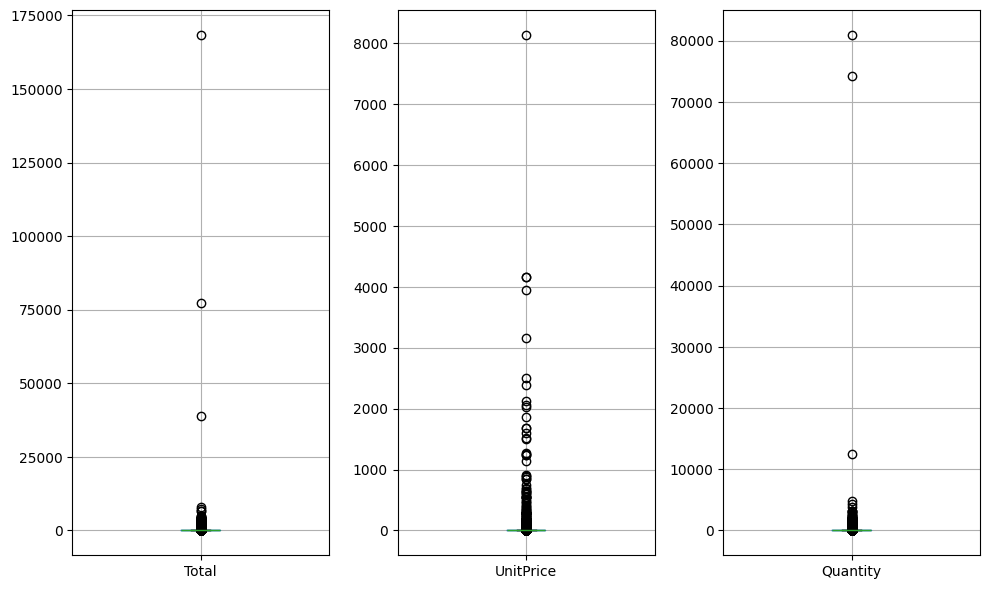

In [21]:
fig, ax = plt.subplots(ncols = 3, figsize=(10,6))
df.boxplot(column=["Total"], ax=ax[0])
df.boxplot(column=["UnitPrice"], ax=ax[1])
df.boxplot(column=["Quantity"], ax=ax[2])


plt.tight_layout()
plt.show()

In [ ]:
ultima_compra = df.groupby("CustomerID")["InvoiceDate"].max()

reference_date = df["InvoiceDate"].max() + dt.timedelta(days = 1)

recency = (reference_date - ultima_compra).dt.days
frequency = df.groupby("CustomerID")["InvoiceDate"].count()
monetary = df.groupby("CustomerID")["Total"].sum()

rfm = pd.DataFrame({
    "CustomerID": recency.index,
    "Recency": recency.values,
    "Frequency": frequency.values,
    "MonetaryValue": monetary.values
})


#rfm["Recency Score"] = pd.qcut(rfm["Recency"], 5, labels=[5, 4, 3, 2, 1])
#rfm["Frequency Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
#rfm["Monetary Score"] = pd.qcut(rfm["MonetaryValue"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

display(rfm)

,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,326,1,77183.60
1,12347.0,2,151,3598.21
2,12348.0,75,14,904.44
3,12349.0,19,73,1757.55
4,12350.0,310,17,334.40
...,...,...,...,...
4215,18280.0,278,10,180.60
4216,18281.0,181,7,80.82
4217,18282.0,8,12,178.05
4218,18283.0,4,756,2094.88


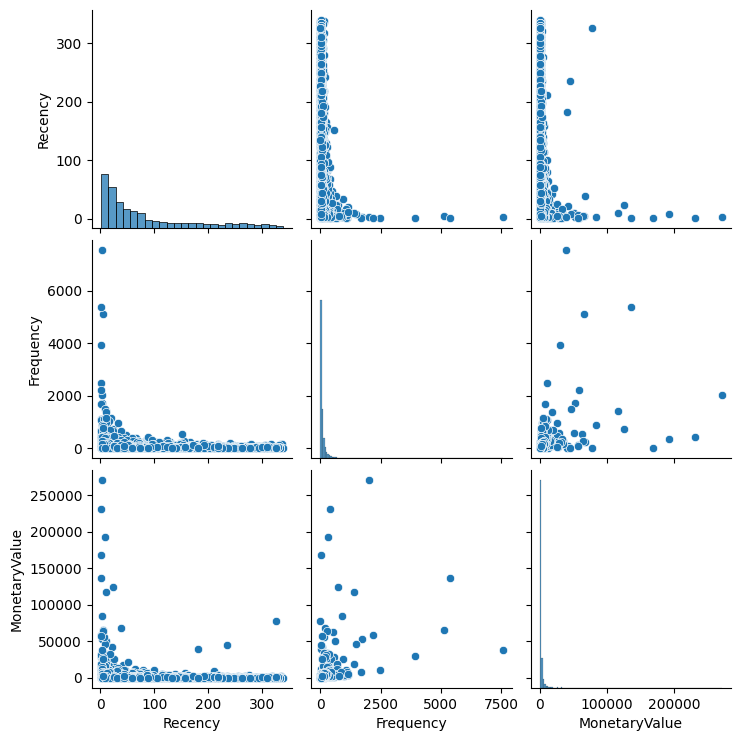

In [11]:
sns.pairplot(rfm[["Recency", "Frequency", "MonetaryValue"]])
plt.show()

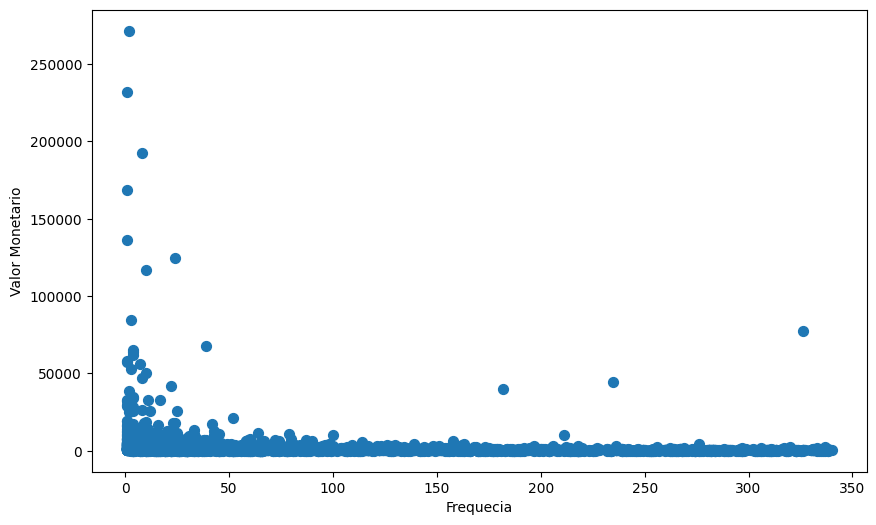

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(rfm["Recency"], rfm["MonetaryValue"], s = 50)
plt.xlabel("Frequecia")
plt.ylabel("Valor Monetario")
plt.show()

In [13]:
from sklearn.cluster import KMeans

X = rfm[["Recency", "MonetaryValue"]]

valores_k = []  #Within-Cluster Sum of Squares (WCSS) - soma dos quadrados dentro do cluster

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    valores_k.append(kmeans.inertia_)

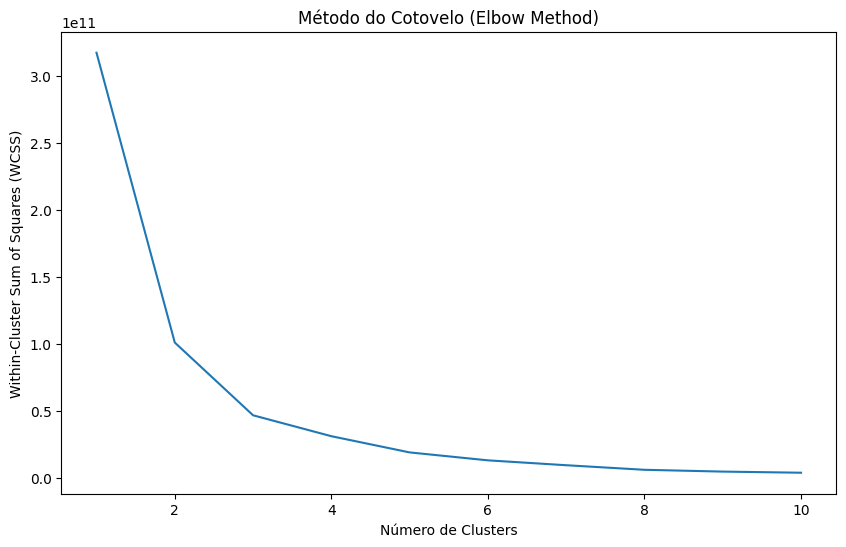

In [14]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11), valores_k)
plt.xlabel("Número de Clusters")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Método do Cotovelo (Elbow Method)")
plt.show()

In [15]:
kmeans = KMeans(n_clusters=4, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Cluster - Recency vs MonetaryValue

In [16]:
rfm["Cluster"] = y_kmeans
display(rfm)

,CustomerID,Recency,Frequency,MonetaryValue,Cluster
0,12346.0,326,1,77183.60,2
1,12347.0,2,151,3598.21,0
2,12348.0,75,14,904.44,0
3,12349.0,19,73,1757.55,0
4,12350.0,310,17,334.40,0
...,...,...,...,...,...
4215,18280.0,278,10,180.60,0
4216,18281.0,181,7,80.82,0
4217,18282.0,8,12,178.05,0
4218,18283.0,4,756,2094.88,0


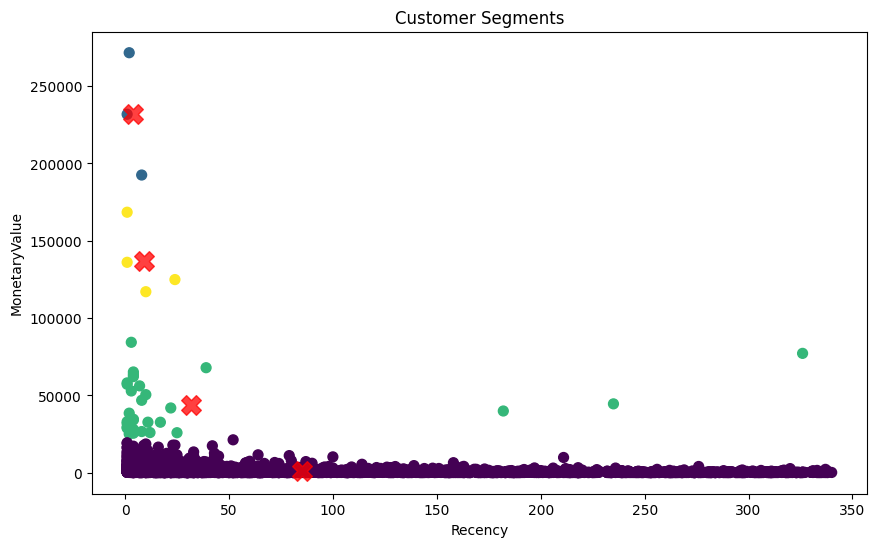

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_kmeans, s=50, cmap="viridis")
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="red", s=200, alpha=0.75, marker="X")
plt.xlabel("Recency")
plt.ylabel("MonetaryValue")
plt.title("Customer Segments")
plt.show()

# Normalização

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'MonetaryValue']])

rfm_scaled

array([[ 2.67778268, -0.39685451,  8.67588825],
       [-0.91935899,  0.2866253 ,  0.18713754],
       [-0.10889188, -0.33761959, -0.12361358],
       ...,
       [-0.85274525, -0.34673266, -0.20740934],
       [-0.89715441,  3.04332723,  0.01371461],
       [-0.46416513, -0.0824538 , -0.01600192]], shape=(4220, 3))

In [19]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(rfm_scaled)
rfm['Cluster'] = kmeans.labels_

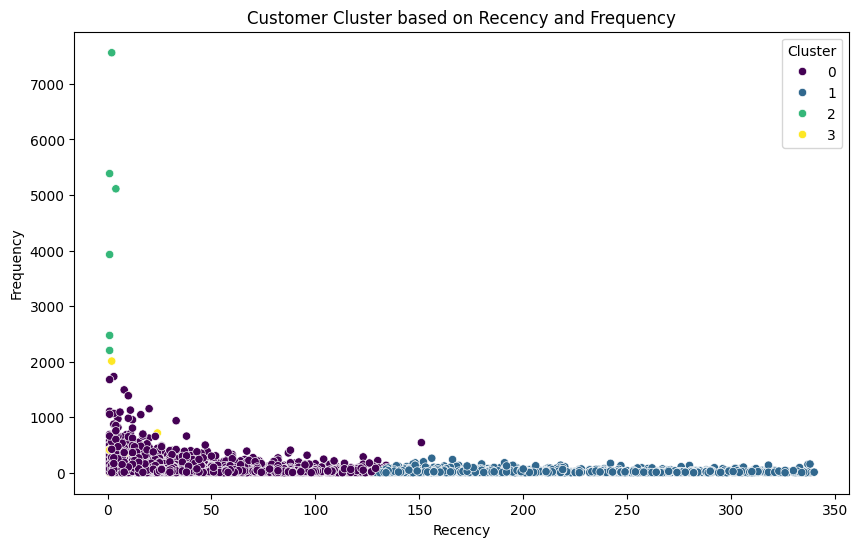

In [23]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Recency', y = 'Frequency', hue = 'Cluster', data = rfm, palette = 'viridis')
plt.title('Customer Cluster based on Recency and Frequency')
plt.show()